<a href="https://colab.research.google.com/github/Bharatgwl/DEEPFAKE/blob/main/SDXL_TEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from huggingface_hub import login

login()  # paste your HF token

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
import torch
from diffusers import StableDiffusionXLPipeline
from PIL import Image
from IPython.display import display

# ======================
# CONFIG (EDIT THIS)
# ======================
BASE_MODEL = "stabilityai/stable-diffusion-xl-base-1.0"
LORA_REPO  = "Bharatgwl/sdxl-Bharat-lora"
LORA_SCALE = 1.0

# ======================
# Load pipeline
# ======================
pipe = StableDiffusionXLPipeline.from_pretrained(
    BASE_MODEL,
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16"
).to("cuda")

pipe.enable_attention_slicing()
pipe.vae.enable_slicing()

try:
    pipe.enable_xformers_memory_efficient_attention()
except:
    pass


# Load LoRA
pipe.load_lora_weights(LORA_REPO)

print("✅ Model + LoRA loaded successfully")

Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/196 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/517 [00:00<?, ?it/s]

pytorch_lora_weights.safetensors:   0%|          | 0.00/23.4M [00:00<?, ?B/s]

No LoRA keys associated to CLIPTextModel found with the prefix='text_encoder'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModel related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new
No LoRA keys associated to CLIPTextModelWithProjection found with the prefix='text_encoder_2'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModelWithProjection related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new


✅ Model + LoRA loaded successfully


  0%|          | 0/30 [00:00<?, ?it/s]

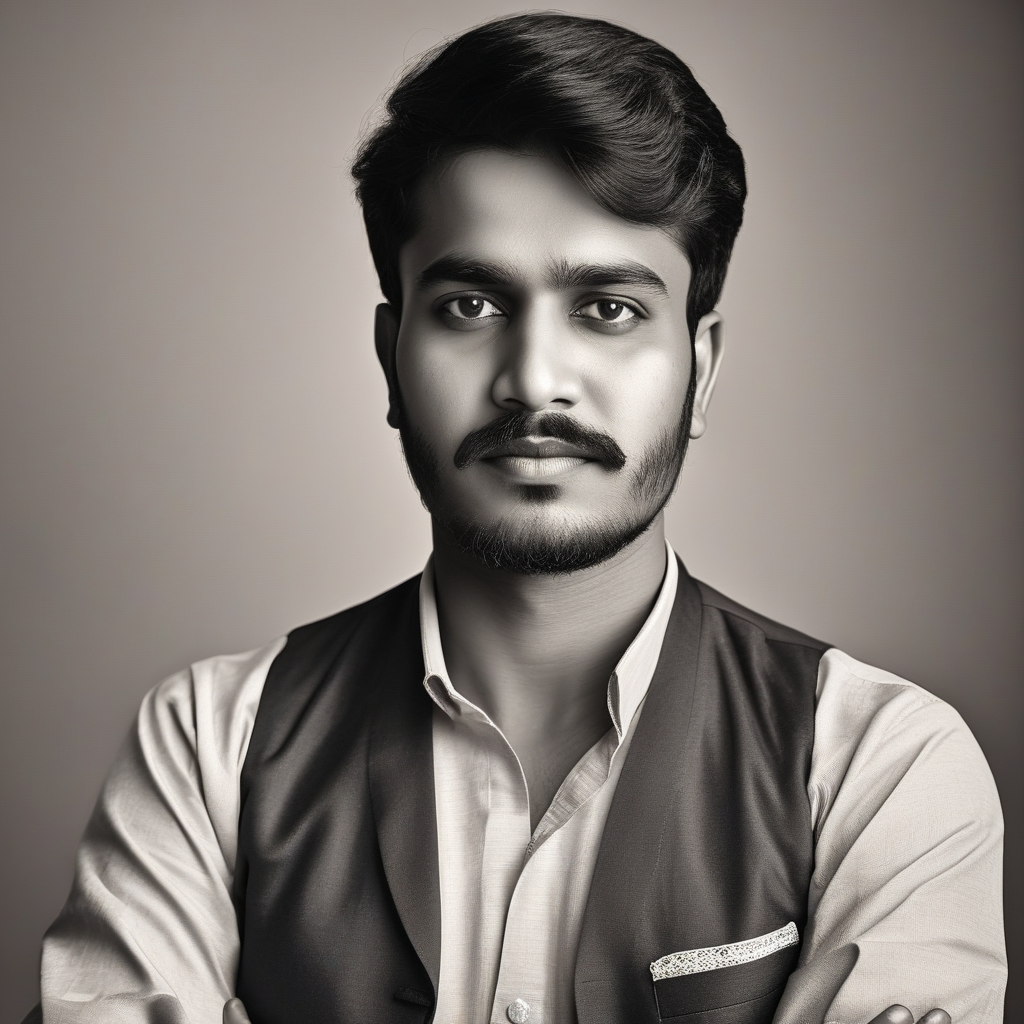

✅ Image saved


In [ ]:
import datetime

prompt = "a photo of Bharat person,  portrait, studio lighting, high detail"
negative_prompt = "blurry, low quality, distorted, deformed, bad anatomy"

num_steps = 30
guidance  = 7.5
width     = 768
height    = 768
seed      = 42

generator = None
if seed != -1:
    generator = torch.Generator("cuda").manual_seed(seed)

with torch.inference_mode():
    image = pipe(
        prompt=prompt,
        negative_prompt=negative_prompt,
        num_inference_steps=num_steps,
        # guidance_scale=guidance,
        # width=width,
        # height=height,
        cross_attention_kwargs={"scale": 0.7},
        generator=generator
    ).images[0]

display(image)

# Save image
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
image.save(f"output_{timestamp}.png")
print("✅ Image saved")

  0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/diffusers/pipelines/stable_diffusion_xl/pipeline_stable_diffusion_xl.py:748: FutureWarning: `upcast_vae` is deprecated and will be removed in version 1.0.0. `upcast_vae` is deprecated. Please use `pipe.vae.to(torch.float32)`. For more details, please refer to: https://github.com/huggingface/diffusers/pull/12619#issue-3606633695.
  deprecate(


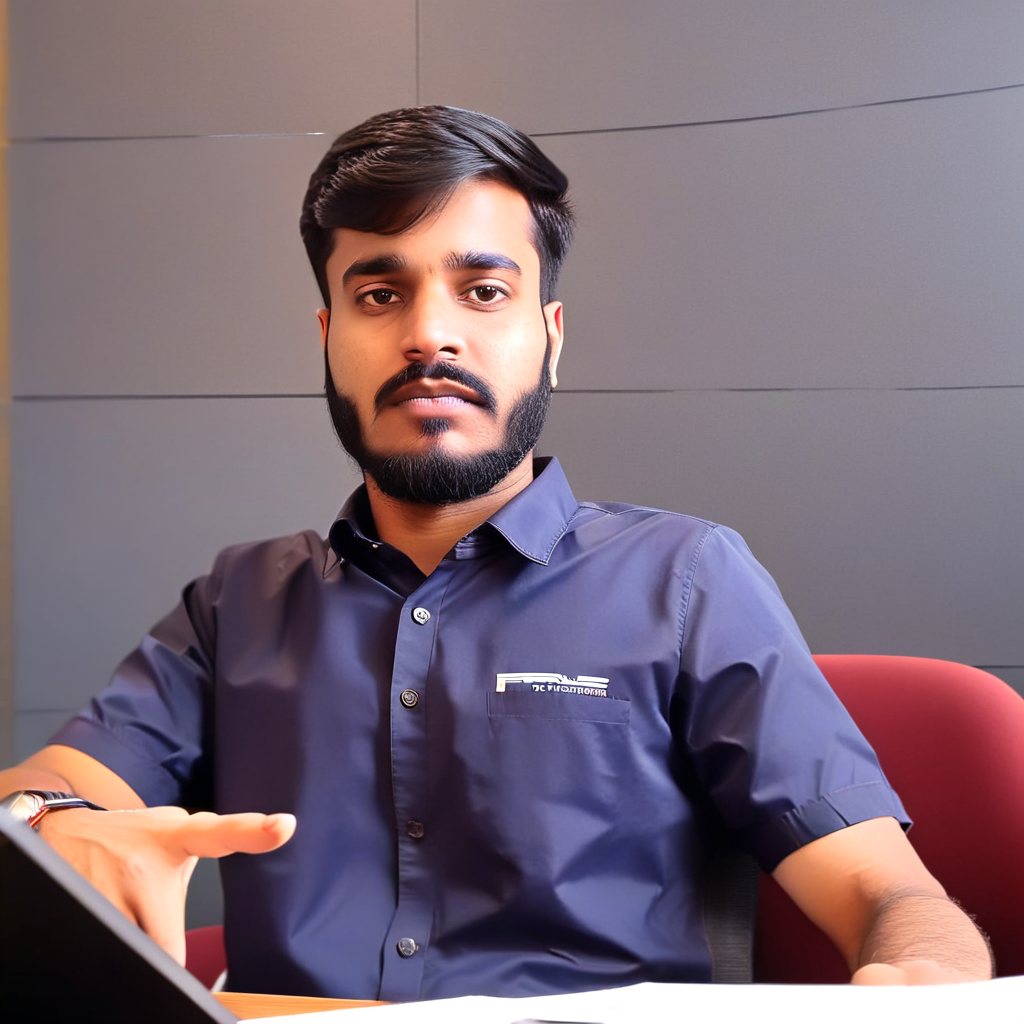

  0%|          | 0/25 [00:00<?, ?it/s]

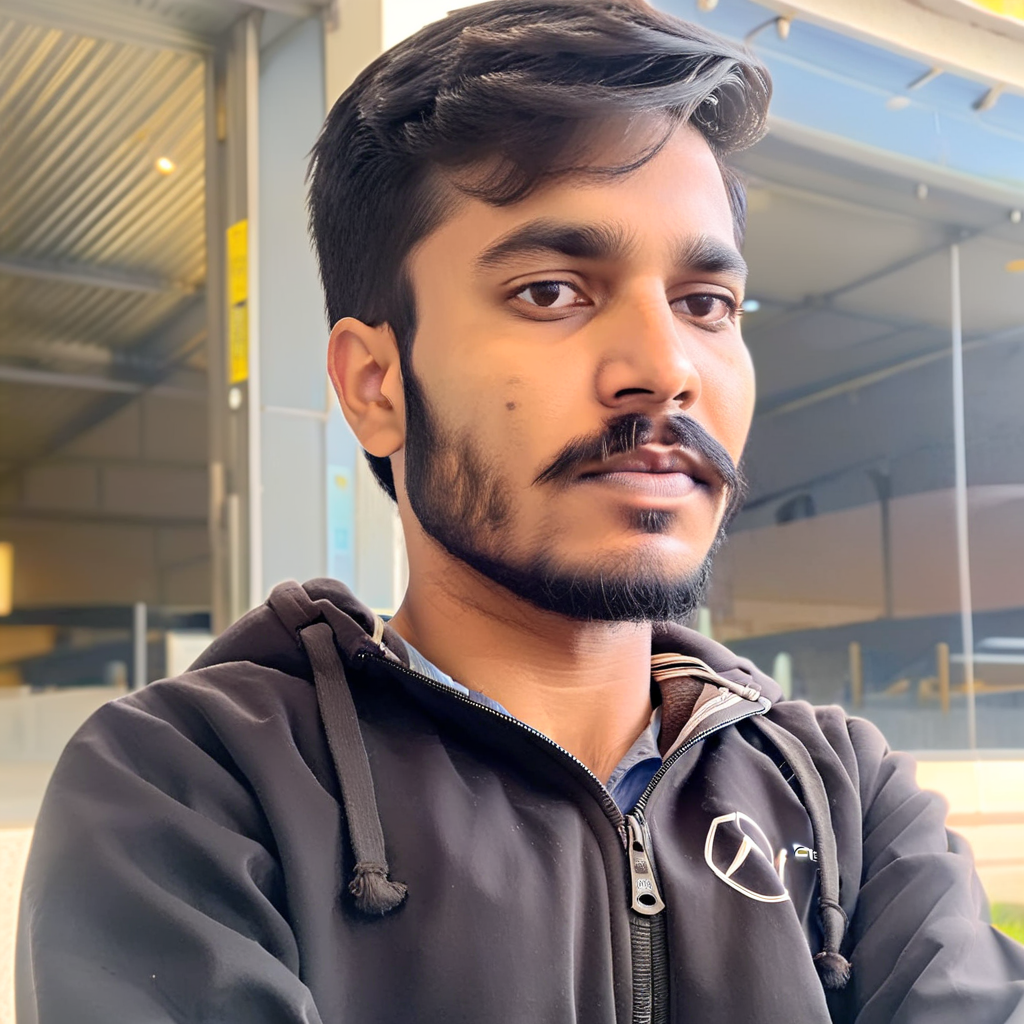

  0%|          | 0/25 [00:00<?, ?it/s]

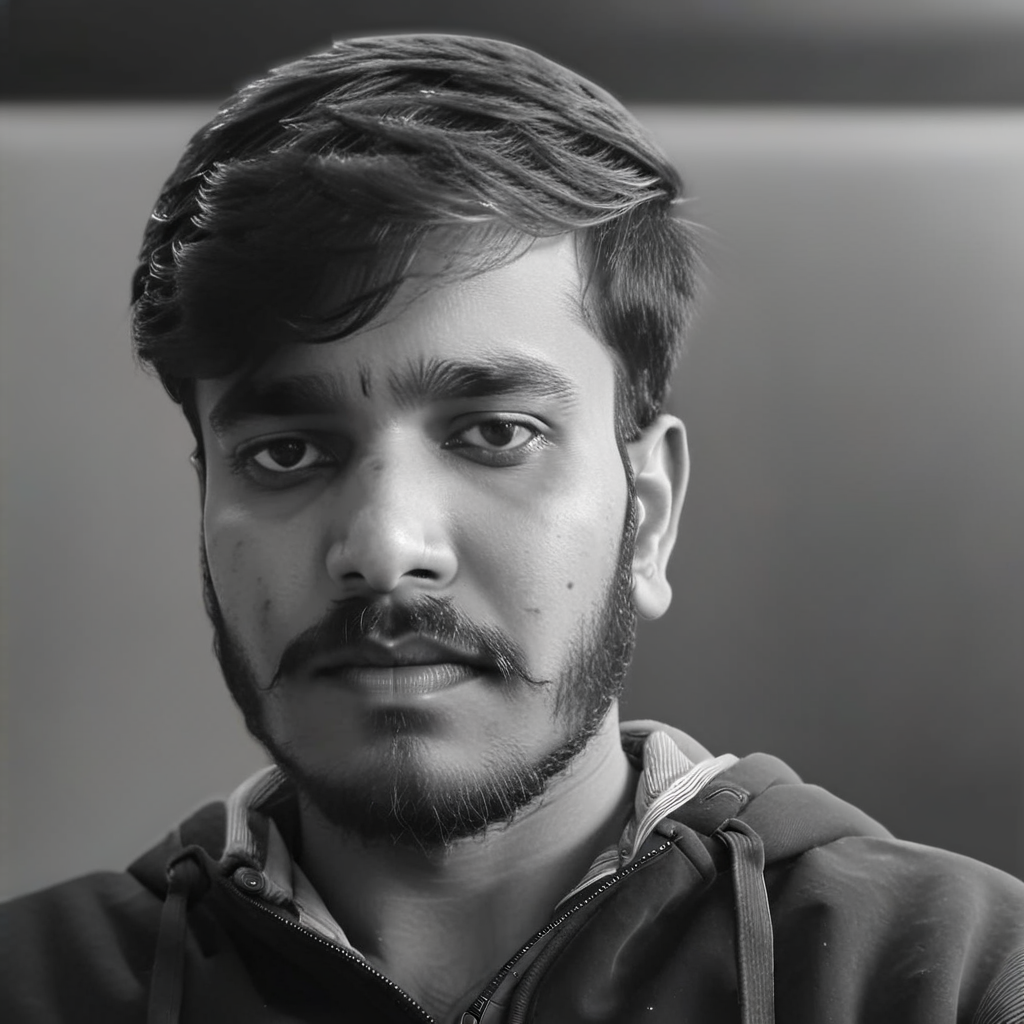

In [ ]:
prompts = [
    "a photo of Bharat person, professional headshot",
    "a photo of Bharat person, outdoor portrait, natural lighting",
    "a photo of Bharat person, cinematic lighting"
]

for i, p in enumerate(prompts):
    img = pipe(
        prompt=p,
        num_inference_steps=25,
        guidance_scale=7,

        cross_attention_kwargs={"scale": 1.0}
    ).images[0]

    display(img)
    img.save(f"sample_{i+1}.png")